In [21]:
# import the necessary packages

from __future__ import print_function
from imutils.object_detection import non_max_suppression
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt

In [22]:
# initialize hte HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

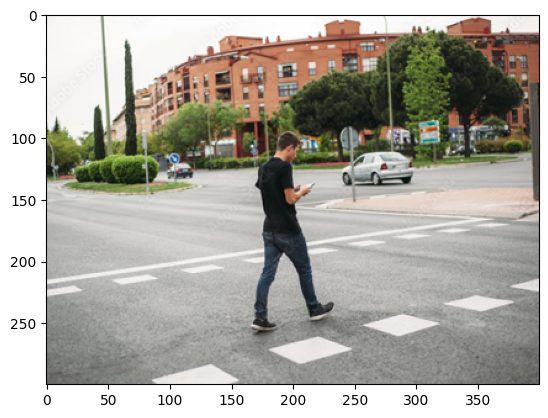

In [23]:
# download the image for testing
import requests

# URL of the image to be downloaded
url = "https://www.uab.edu/news/media/k2/items/cache/4bd9d6764ad7c49654f02ed2078e84c3_XL.jpg"

# Send a HTTP request to the URL
response = requests.get(url)

# Convert the response content to a NumPy array
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)

# Decode the NumPy array to an image
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
image = imutils.resize(image, width=min(400, image.shape[1]))
orig = image.copy()

# opencv stores images in BGR color order for historical reasons
# convert image to RGB and display it
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [24]:
# detect people in the image
(rects, weights) = hog.detectMultiScale(image, winStride=(4, 4), padding=(8, 8), scale=1.05)

# draw the original bounding boxes
for (x, y, w, h) in rects:
    cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)

# apply non-maxima suppression to the bounding boxes using a 
# fairly large overlap theshold to try to maintain overlapping
# boxes that are still people
rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)

# draw the final bounding boxes
for (xA, yA, xB, yB) in pick:
    cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)

# show some information on the number of bouding boxes
print("[INFO]: {} original boxes, {} after supression".format(len(rects), len(pick)))

[INFO]: 1 original boxes, 1 after supression


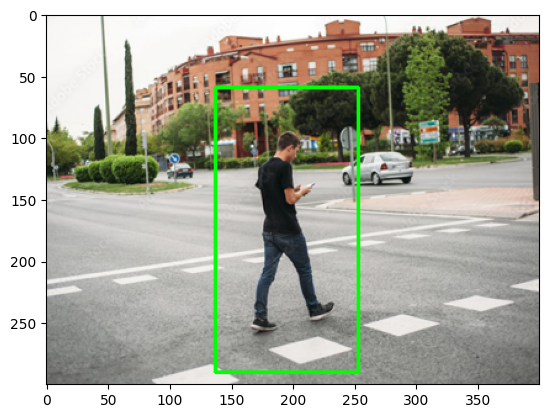

In [25]:
# show the output images
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)